# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

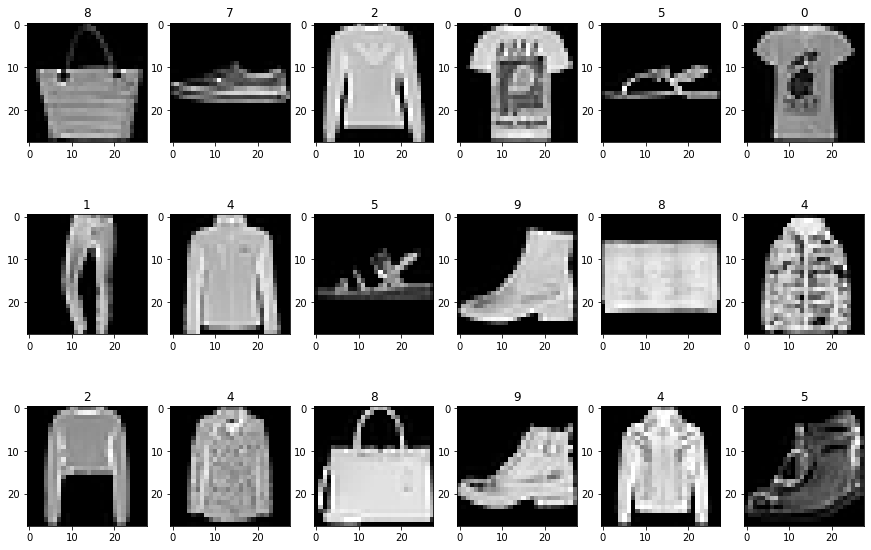

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [4]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [5]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [6]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 26s 28ms/step - loss: 0.3937 - accuracy: 0.8624 - val_loss: 0.3291 - val_accuracy: 0.8812
Epoch 2/50
938/938 [==============================] - 25s 27ms/step - loss: 0.2701 - accuracy: 0.9042 - val_loss: 0.2943 - val_accuracy: 0.8918
Epoch 3/50
938/938 [==============================] - 25s 27ms/step - loss: 0.2325 - accuracy: 0.9159 - val_loss: 0.3040 - val_accuracy: 0.8947
Epoch 4/50
938/938 [==============================] - 25s 27ms/step - loss: 0.2024 - accuracy: 0.9260 - val_loss: 0.3083 - val_accuracy: 0.8960
Epoch 5/50
938/938 [==============================] - 24s 26ms/step - loss: 0.1797 - accuracy: 0.9343 - val_loss: 0.3088 - val_accuracy: 0.8983
Epoch 6/50
938/938 [==============================] - 25s 27ms/step - loss: 0.1616 - accuracy: 0.9407 - val_loss: 0.3100 - val_accuracy: 0.8997
Epoch 7/50
938/938 [==============================] - 26s 28ms/step - loss: 0.1449 - accuracy: 0.9462 - val_loss: 0.3260 - val_accuracy:

Train Acc      0.9960166811943054
Validation Acc 0.8835999965667725


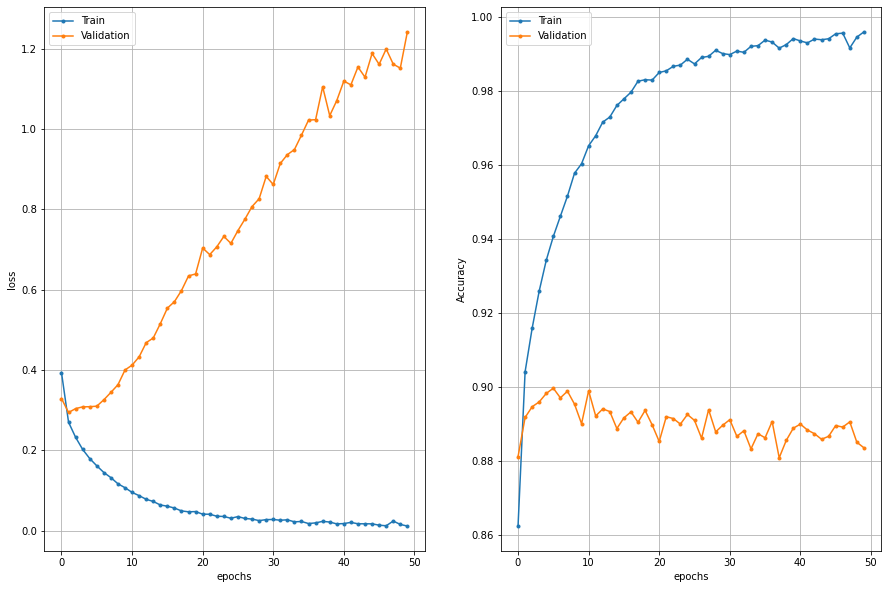

In [7]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [108]:
from keras.layers import Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
# net = BatchNormalization()(net)
net = MaxPooling2D((2, 2))(net)
net = Dropout(0.3)(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
# net = BatchNormalization()(net)
net = MaxPooling2D((2, 2))(net)
net = Dropout(0.4)(net)
net = Flatten()(net)
net = Dense(128, activation="relu")(net)
# net = BatchNormalization()(net)
net = Dropout(0.5)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_121 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_125 (Dropout)        (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_122 (MaxPoolin (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_126 (Dropout)        (None, 7, 7, 64)        

In [109]:
# Train the network
epochs = 30
batch_size = 128

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 19s 41ms/step - loss: 0.6458 - accuracy: 0.7641 - val_loss: 0.4151 - val_accuracy: 0.8440
Epoch 2/30
469/469 [==============================] - 19s 41ms/step - loss: 0.4286 - accuracy: 0.8472 - val_loss: 0.3416 - val_accuracy: 0.8753
Epoch 3/30
469/469 [==============================] - 20s 42ms/step - loss: 0.3793 - accuracy: 0.8635 - val_loss: 0.3070 - val_accuracy: 0.8858
Epoch 4/30
469/469 [==============================] - 19s 41ms/step - loss: 0.3490 - accuracy: 0.8735 - val_loss: 0.2916 - val_accuracy: 0.8944
Epoch 5/30
469/469 [==============================] - 20s 42ms/step - loss: 0.3260 - accuracy: 0.8818 - val_loss: 0.2785 - val_accuracy: 0.8973
Epoch 6/30
469/469 [==============================] - 19s 42ms/step - loss: 0.3099 - accuracy: 0.8864 - val_loss: 0.2715 - val_accuracy: 0.9018
Epoch 7/30
469/469 [==============================] - 20s 42ms/step - loss: 0.2987 - accuracy: 0.8921 - val_loss: 0.2558 - val_accuracy:

Train Acc      0.9209333062171936
Validation Acc 0.9193000197410583


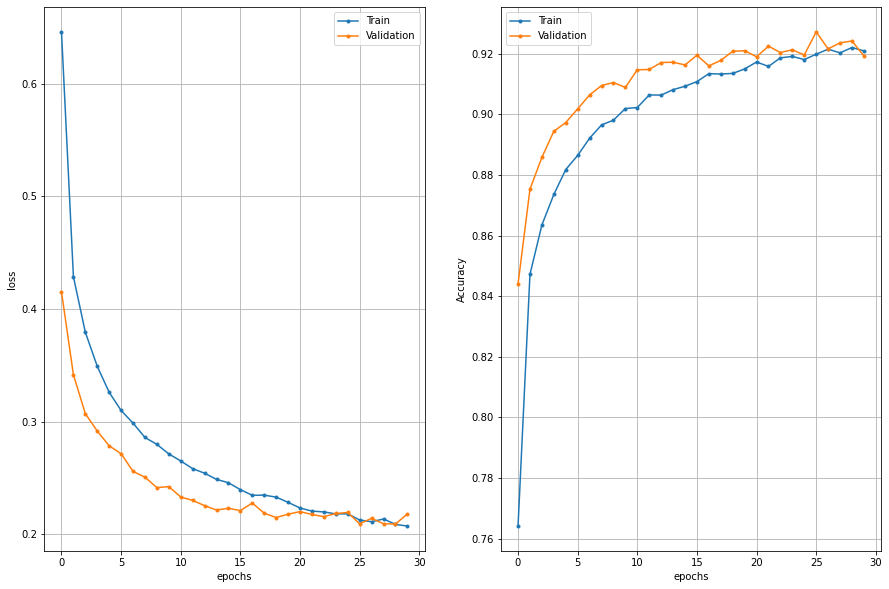

In [110]:
# Show the results
plot_history(history)

### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?